In [1]:
#Importing The Required Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
 #from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [2]:
data_location = 'Amazon Customer Behavior Survey.csv'
df = pd.read_csv(data_location)

In [3]:
df.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas'],
      dtype='object')

In [4]:
df.isna().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

In [5]:
df.describe()

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
df.dtypes

Timestamp                                 object
age                                        int64
Gender                                    object
Purchase_Frequency                        object
Purchase_Categories                       object
Personalized_Recommendation_Frequency     object
Browsing_Frequency                        object
Product_Search_Method                     object
Search_Result_Exploration                 object
Customer_Reviews_Importance                int64
Add_to_Cart_Browsing                      object
Cart_Completion_Frequency                 object
Cart_Abandonment_Factors                  object
Saveforlater_Frequency                    object
Review_Left                               object
Review_Reliability                        object
Review_Helpfulness                        object
Personalized_Recommendation_Frequency      int64
Recommendation_Helpfulness                object
Rating_Accuracy                            int64
Shopping_Satisfactio

In [7]:
df.drop(['Timestamp'],inplace=True,axis=1)
df

,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,Yes,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,Yes,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,Yes,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,Maybe,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,Yes,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,Maybe,...,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,4,Competitive prices,Customer service responsiveness
598,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,Maybe,...,Sometimes,Yes,Heavily,Sometimes,3,Sometimes,3,3,Product recommendations,Reducing packaging waste
599,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,Maybe,...,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,2,3,Wide product selection,Product quality and accuracy
600,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,Yes,...,Sometimes,No,Heavily,Yes,2,Yes,2,2,Wide product selection,Product quality and accuracy


# I.Number of independent and dependent variables

In [9]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Amazon Customer Behavior Survey.csv')

dependent_variable = 'Shopping_Satisfaction'

# All other variables would be considered independent
independent_variables = data.columns.drop(dependent_variable)

# Printing the number of independent and dependent variables
print("Number of Independent Variables:", len(independent_variables))
print("Number of Dependent Variables:", 1)  # Since we identified only one dependent variable


Number of Independent Variables: 22
Number of Dependent Variables: 1


In [10]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Amazon Customer Behavior Survey.csv')


dependent_variable = 'Shopping_Satisfaction'

# All other variables would be considered independent
independent_variables = data.columns.drop(dependent_variable)

# Printing the number of independent and dependent variables
print("Independent Variables:", independent_variables)
print("Dependent Variable:", dependent_variable)


Independent Variables: Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Service_Appreciation', 'Improvement_Areas'],
      dtype='object')
Dependent Variable: Shopping_Satisfaction


In [11]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Amazon Customer Behavior Survey.csv')

dependent_variable = 'Shopping_Satisfaction'

# All other variables would be considered independent
independent_variables = data.columns.drop(dependent_variable)

# Printing the number of independent and dependent variables before removal
print("Number of Independent Variables before removal:", len(independent_variables))
print("Number of Dependent Variable:", 1)  # Assuming the dependent variable is always one

irrelevant_variables_to_remove = ['Irrelevant_Var1', 'Irrelevant_Var2']

# Check if the irrelevant variables to remove are present in the dataset
irrelevant_variables_present = [col for col in irrelevant_variables_to_remove if col in independent_variables]

# Removing irrelevant variables
independent_variables = independent_variables.drop(irrelevant_variables_present)

# Printing the names of irrelevant variables actually present in the dataset
print("Irrelevant Variables Found in Dataset:", irrelevant_variables_present)

# Printing the number of independent variables after removal
print("Number of Independent Variables after removal:", len(independent_variables))

# Calculating the proportion of irrelevant predictive/independent variables removed
proportion_removed = len(irrelevant_variables_present) / len(data.columns) * 100
print("Proportion of Irrelevant Predictive/Independent Variables Removed: {:.2f}%".format(proportion_removed))


Number of Independent Variables before removal: 22
Number of Dependent Variable: 1
Irrelevant Variables Found in Dataset: []
Number of Independent Variables after removal: 22
Proportion of Irrelevant Predictive/Independent Variables Removed: 0.00%


# II.Number of records

In [13]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Amazon Customer Behavior Survey.csv')

# The number of records in the dataset
number_of_records = data.shape[0]

# Printing the number of records
print("Number of Records in the Dataset:", number_of_records)


Number of Records in the Dataset: 602


# III.Data types of combination

In [15]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Amazon Customer Behavior Survey.csv')

# Define a function to categorize data types
def categorize_data_types(df):
    binary_cols = []
    nominal_cols = []
    categorical_cols = []
    textual_cols = []
    numerical_cols = []

    for column in df.columns:
        unique_values = df[column].nunique()
        if df[column].dtype == 'object':
            if unique_values == 2:
                binary_cols.append(column)
            elif unique_values > 2 and unique_values < 20:
                categorical_cols.append(column)
            else:
                textual_cols.append(column)
        elif df[column].dtype == 'int64' or df[column].dtype == 'float64':
            numerical_cols.append(column)
            if unique_values == 2:
                binary_cols.append(column)

    # Calculate counts
    counts = {
        "Binary Columns": len(binary_cols),
        "Nominal Columns": len(nominal_cols),
        "Categorical Columns": len(categorical_cols),
        "Textual Columns": len(textual_cols),
        "Numerical Columns": len(numerical_cols)
    }

    return binary_cols, nominal_cols, categorical_cols, textual_cols, numerical_cols, counts

# Categorize columns
binary, nominal, categorical, textual, numerical, counts = categorize_data_types(data)

# Printing the results
print("Binary Columns:", binary)
print("Nominal Columns:", nominal)
print("Categorical Columns:", categorical)
print("Textual Columns:", textual)
print("Numerical Columns:", numerical)
print("Counts:", counts)


Binary Columns: ['Search_Result_Exploration', 'Review_Left']
Nominal Columns: []
Categorical Columns: ['Gender', 'Purchase_Frequency', 'Personalized_Recommendation_Frequency', 'Browsing_Frequency', 'Product_Search_Method', 'Add_to_Cart_Browsing', 'Cart_Completion_Frequency', 'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Reliability', 'Review_Helpfulness', 'Recommendation_Helpfulness', 'Service_Appreciation', 'Improvement_Areas']
Textual Columns: ['Timestamp', 'Purchase_Categories']
Numerical Columns: ['age', 'Customer_Reviews_Importance', 'Personalized_Recommendation_Frequency ', 'Rating_Accuracy ', 'Shopping_Satisfaction']
Counts: {'Binary Columns': 2, 'Nominal Columns': 0, 'Categorical Columns': 14, 'Textual Columns': 2, 'Numerical Columns': 5}


# IV.Summary of each variable: min, max, mean, median, and quartiles

In [17]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Amazon Customer Behavior Survey.csv')

# Selecting only numerical columns for summary statistics
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Calculating summary statistics
summary_statistics = numerical_data.describe()

# Adding median (50th percentile)
summary_statistics.loc['median'] = numerical_data.median()

# Print the summary statistics
print(summary_statistics)


               age  Customer_Reviews_Importance  \
count   602.000000                   602.000000   
mean     30.790698                     2.480066   
std      10.193276                     1.185226   
min       3.000000                     1.000000   
25%      23.000000                     1.000000   
50%      26.000000                     3.000000   
75%      36.000000                     3.000000   
max      67.000000                     5.000000   
median   26.000000                     3.000000   

        Personalized_Recommendation_Frequency   Rating_Accuracy   \
count                               602.000000        602.000000   
mean                                  2.699336          2.672757   
std                                   1.042028          0.899744   
min                                   1.000000          1.000000   
25%                                   2.000000          2.000000   
50%                                   3.000000          3.000000   
75%          

# V.DataCleaning

### a.Number and proportion of irrelevant predictive/independent variables

In [18]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('Amazon Customer Behavior Survey.csv')

# Function to identify irrelevant variables
def identify_irrelevant_variables(df, threshold=0.1):
    irrelevant_variables = []
    
    # Remove non-numeric columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df_numeric = df[numeric_columns]
    
    # Compute variance threshold
    variances = df_numeric.var()
    low_variance_vars = variances[variances < threshold].index.tolist()
    irrelevant_variables.extend(low_variance_vars)
    
    # Compute correlation threshold
    corr_matrix = df_numeric.corr().abs()
    upper = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    highly_correlated = [column for column in corr_matrix.columns if any(corr_matrix[column] > threshold)]
    irrelevant_variables.extend(highly_correlated)
    
    # Remove duplicates
    irrelevant_variables = list(set(irrelevant_variables))
    
    return irrelevant_variables

# Set threshold for variance and correlation
variance_threshold = 0.1
correlation_threshold = 0.7

# Identify irrelevant variables
irrelevant_variables = identify_irrelevant_variables(data, threshold=variance_threshold)

# Remove irrelevant variables from the dataset
data_cleaned = data.drop(irrelevant_variables, axis=1)

# Calculate the number and proportion of irrelevant variables removed
number_removed = len(irrelevant_variables)
proportion_removed = number_removed / len(data.columns)

print("Number of irrelevant variables removed:", number_removed)
print("Proportion of irrelevant variables removed:", proportion_removed)


Number of irrelevant variables removed: 5
Proportion of irrelevant variables removed: 0.21739130434782608


### b. Number and proportion of duplications removed

In [141]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Amazon Customer Behavior Survey.csv')  # Adjust the path as needed

# Find duplicate rows in the dataset
duplicates = data[data.duplicated()]

# Display the duplicates and count of such rows
print("\nNumber of duplicate rows:", duplicates.shape[0])

# If you want to drop duplicates, you can use the following line:
# data = data



Number of duplicate rows: 0


### c. Dimensionality reduction based on PCA/OLS and self-observation;

In [20]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('Amazon Customer Behavior Survey.csv')

# Data Cleaning: Removing duplicate rows and filling missing values
data_cleaned = data.drop_duplicates()
mode_value = data_cleaned['Product_Search_Method'].mode()[0]
data_cleaned['Product_Search_Method'].fillna(mode_value, inplace=True)

# Removing an irrelevant column
data_cleaned = data_cleaned.drop(columns=['Timestamp'])

# Outlier Detection and Management
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return ((series < (Q1 - 1.5 * IQR)) | (series > (Q3 + 1.5 * IQR)))

numerical_columns = data_cleaned.select_dtypes(include=['int64']).columns
for col in numerical_columns:
    outliers = detect_outliers(data_cleaned[col])
    # Here you could remove or cap outliers; this step is skipped for simplicity

# Applying PCA to the numerical columns
scaler = StandardScaler()
data_numerical_scaled = scaler.fit_transform(data_cleaned[numerical_columns])
pca = PCA(n_components=2)  # Adjust n_components based on your needs
principal_components = pca.fit_transform(data_numerical_scaled)
explained_variance = pca.explained_variance_ratio_

# Adding PCA results to the cleaned dataframe
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
data_cleaned = pd.concat([data_cleaned.reset_index(drop=True), pca_df], axis=1)

# Printing results and variance explained
print(data_cleaned.head())
print("Variance explained by PCA components:", explained_variance)


   age             Gender      Purchase_Frequency  \
0   23             Female       Few times a month   
1   23             Female            Once a month   
2   24  Prefer not to say       Few times a month   
3   24             Female            Once a month   
4   22             Female  Less than once a month   

                                 Purchase_Categories  \
0                           Beauty and Personal Care   
1                               Clothing and Fashion   
2    Groceries and Gourmet Food;Clothing and Fashion   
3  Beauty and Personal Care;Clothing and Fashion;...   
4      Beauty and Personal Care;Clothing and Fashion   

  Personalized_Recommendation_Frequency Browsing_Frequency  \
0                                   Yes   Few times a week   
1                                   Yes  Few times a month   
2                                    No  Few times a month   
3                             Sometimes  Few times a month   
4                                 

### d.Missing Values

In [22]:
df1=df.copy()

In [23]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Amazon Customer Behavior Survey.csv')

# Check for missing values
missing_values = data.isnull().sum()

# Print columns with missing values and their respective counts
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])


Columns with Missing Values:
Product_Search_Method    2
dtype: int64


In [24]:
df.isna().sum()

age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas                         0
dtype: int64

In [25]:
bins = [0, 20, 30, 40, 50, float('inf')]
labels = ['15-25', '25-35', '35-45', '45-55', '55+']

df["age"] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [26]:
df.dtypes

age                                       category
Gender                                      object
Purchase_Frequency                          object
Purchase_Categories                         object
Personalized_Recommendation_Frequency       object
Browsing_Frequency                          object
Product_Search_Method                       object
Search_Result_Exploration                   object
Customer_Reviews_Importance                  int64
Add_to_Cart_Browsing                        object
Cart_Completion_Frequency                   object
Cart_Abandonment_Factors                    object
Saveforlater_Frequency                      object
Review_Left                                 object
Review_Reliability                          object
Review_Helpfulness                          object
Personalized_Recommendation_Frequency        int64
Recommendation_Helpfulness                  object
Rating_Accuracy                              int64
Shopping_Satisfaction          

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lst=["age","Gender","Purchase_Categories","Purchase_Frequency","Personalized_Recommendation_Frequency","Recommendation_Helpfulness","Browsing_Frequency","Product_Search_Method","Search_Result_Exploration","Add_to_Cart_Browsing","Cart_Completion_Frequency","Cart_Abandonment_Factors","Saveforlater_Frequency","Review_Left","Review_Reliability","Review_Helpfulness","Service_Appreciation","Improvement_Areas"]
for i in lst:
  df[i]=le.fit_transform(df[i])

In [28]:
df.dtypes

age                                       int64
Gender                                    int64
Purchase_Frequency                        int64
Purchase_Categories                       int64
Personalized_Recommendation_Frequency     int64
Browsing_Frequency                        int64
Product_Search_Method                     int64
Search_Result_Exploration                 int64
Customer_Reviews_Importance               int64
Add_to_Cart_Browsing                      int64
Cart_Completion_Frequency                 int64
Cart_Abandonment_Factors                  int64
Saveforlater_Frequency                    int64
Review_Left                               int64
Review_Reliability                        int64
Review_Helpfulness                        int64
Personalized_Recommendation_Frequency     int64
Recommendation_Helpfulness                int64
Rating_Accuracy                           int64
Shopping_Satisfaction                     int64
Service_Appreciation                    

In [29]:
correlation_matrix = df.corr()

threshold = 0.5

highly_correlated_features = np.where(np.abs(correlation_matrix) > threshold)


for feature1, feature2 in zip(highly_correlated_features[0], highly_correlated_features[1]):
    if feature1 != feature2:
        print(f"{df.columns[feature1]} and {df.columns[feature2]} are highly correlated.")

Rating_Accuracy  and Shopping_Satisfaction are highly correlated.
Shopping_Satisfaction and Rating_Accuracy  are highly correlated.


In [30]:
correlation_matrix = df.corr()

threshold = 0.0009  # Adjust the threshold as needed
low_correlated_features = np.where(np.abs(correlation_matrix) < threshold)

for feature1, feature2 in zip(low_correlated_features[0], low_correlated_features[1]):
    if feature1 != feature2:
        print(f"{df.columns[feature1]} and {df.columns[feature2]} are low correlated.")

Gender and Review_Left are low correlated.
Review_Left and Gender are low correlated.


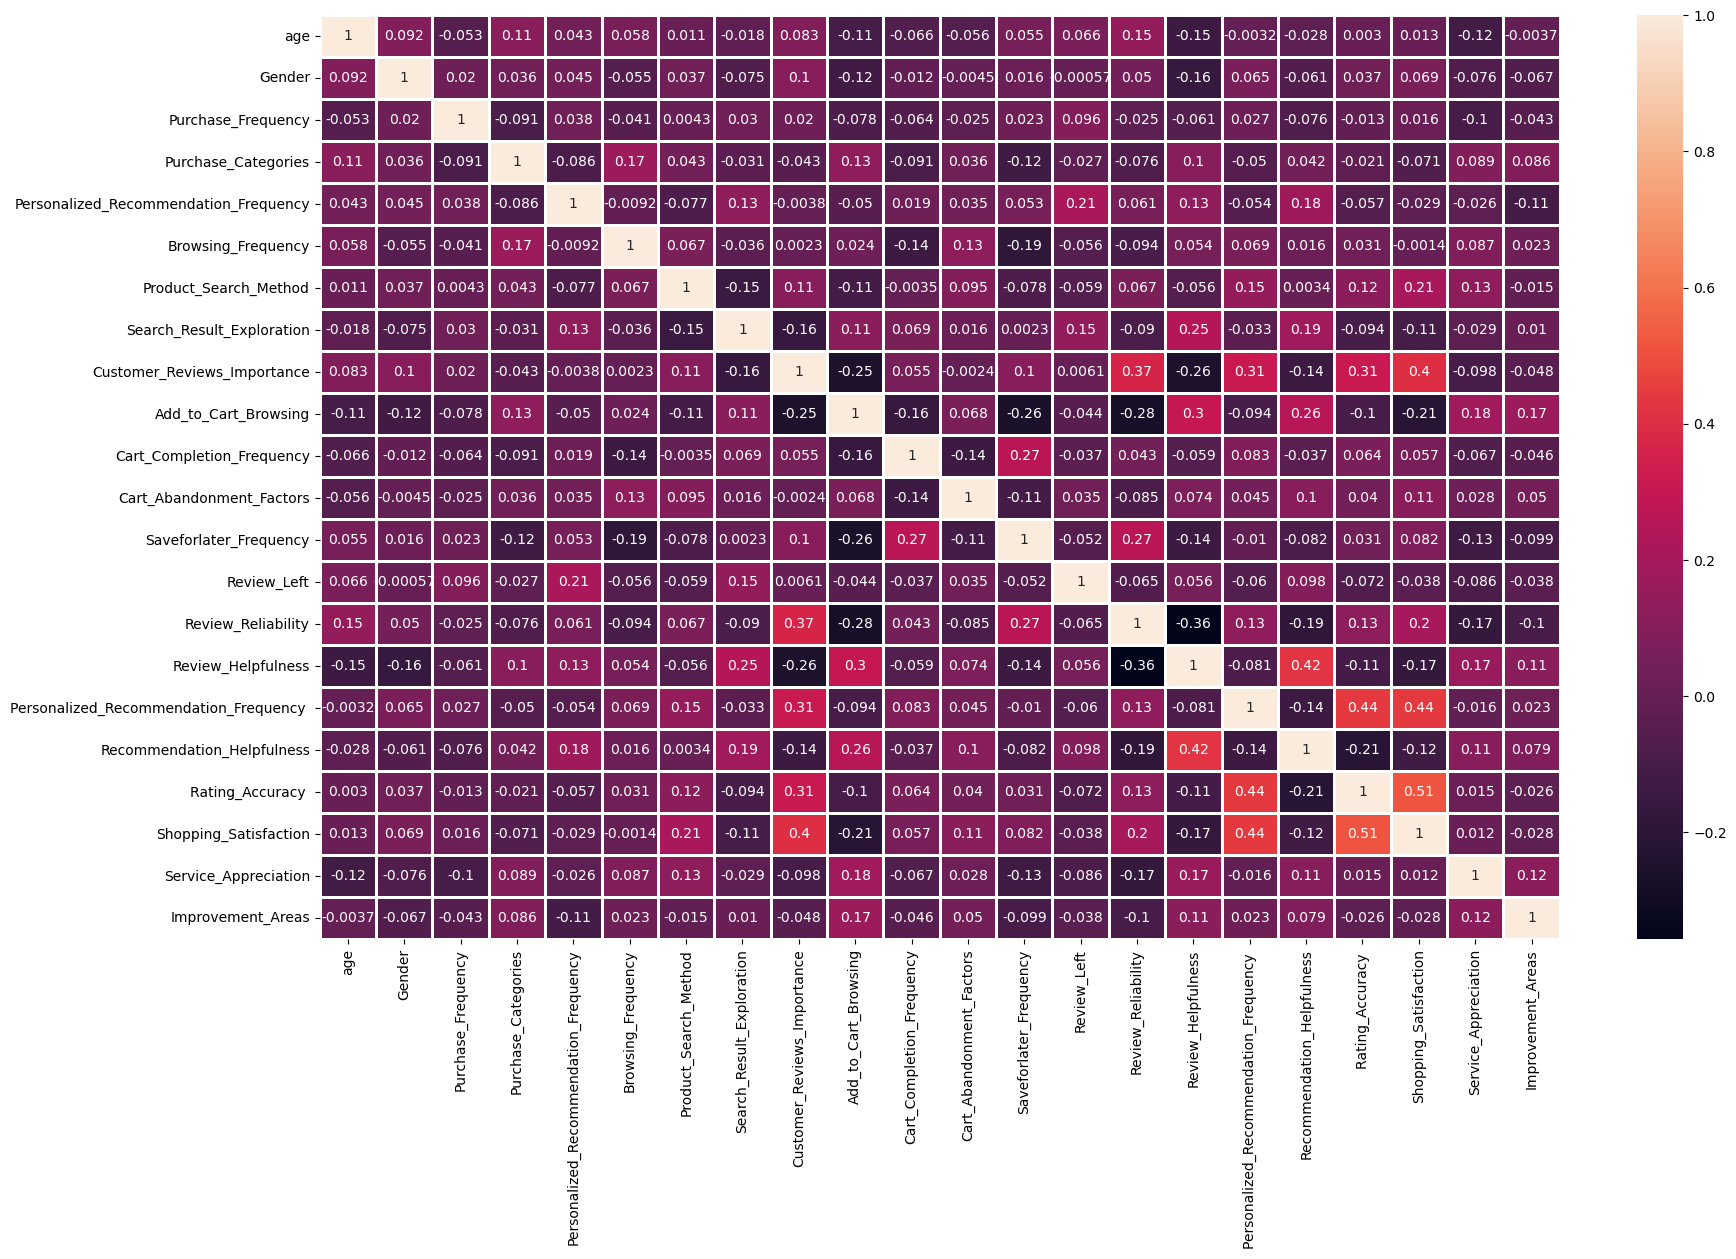

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(20,12))
sns.heatmap(df.corr(),annot=True,linewidths=1)
plt.show()

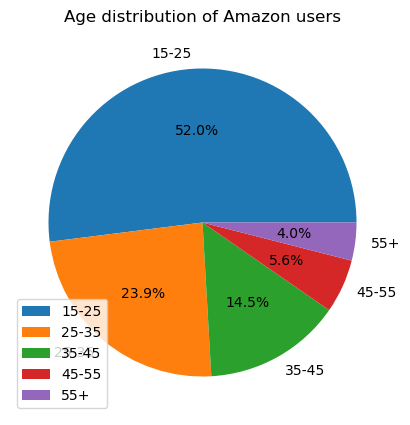

In [32]:
y=df['age'].value_counts()
plt.figure(figsize=(5,5))
labels=['15-25', '25-35', '35-45', '45-55', '55+']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Age distribution of Amazon users')
plt.show()

In [33]:
X=df.drop(["Recommendation_Helpfulness"],axis=1)
y=df.iloc[:,-5]

In [34]:
df['Recommendation_Helpfulness'].value_counts()


Recommendation_Helpfulness
1    273
0    172
2    157
Name: count, dtype: int64

# SPLITING DATASET INTO TRAINING AND TESTING

In [36]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
selector=SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X,y)

# Get the selected feature indices
feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[feature_indices]

# Create a new DataFrame with only the selected features
selected_data = df[selected_features]
# Print the selected features
print(selected_features)

                                       

Index(['Personalized_Recommendation_Frequency', 'Search_Result_Exploration',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Saveforlater_Frequency', 'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Rating_Accuracy ',
       'Shopping_Satisfaction'],
      dtype='object')


In [37]:
xnew=df.drop(['age', 'Gender','Purchase_Frequency', 'Purchase_Categories', 'Browsing_Frequency','Product_Search_Method', 'Customer_Reviews_Importance','Cart_Abandonment_Factors', 'Saveforlater_Frequency','Recommendation_Helpfulness',"Service_Appreciation","Improvement_Areas"],axis=1)

In [38]:
from imblearn.over_sampling import RandomOverSampler
sm=RandomOverSampler()
x,y=sm.fit_resample(xnew,y)

In [39]:
ms=MinMaxScaler()
Xsc=ms.fit_transform(x)
Xsc

array([[1.  , 1.  , 1.  , ..., 0.25, 0.  , 0.  ],
       [1.  , 1.  , 1.  , ..., 0.25, 0.5 , 0.25],
       [0.  , 1.  , 1.  , ..., 0.75, 0.5 , 0.5 ],
       ...,
       [0.  , 1.  , 1.  , ..., 0.  , 0.  , 0.25],
       [1.  , 1.  , 1.  , ..., 0.25, 0.5 , 0.5 ],
       [0.5 , 0.  , 0.5 , ..., 0.25, 0.25, 0.25]])

## KNN USING SKLEARN

In [41]:
X_train,X_test,y_train,y_test=train_test_split(Xsc,y,test_size=0.1,random_state=4)

In [42]:
# Printing the count of testing and training data points
print("Count of training data points:", len(X_train))
print("Count of testing data points:", len(X_test))

Count of training data points: 737
Count of testing data points: 82


In [43]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2,
       1, 1, 0, 1, 1, 0, 2, 1, 0, 0, 1, 0, 2, 0, 2, 1, 0, 0, 1, 1, 0, 0,
       2, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2,
       1, 0, 1, 2, 2, 0, 0, 1, 1, 2, 2, 2, 0, 1, 1, 1])

In [44]:
from sklearn.model_selection import GridSearchCV
params={'n_neighbors':[3,5,7,9],'weights':['uniform','distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
clf=GridSearchCV(knn,params,cv=5,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [45]:
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}


In [46]:
knn1=KNeighborsClassifier(algorithm='auto',n_neighbors=9,weights='distance')
knn1.fit(X_train,y_train)
y_pred1=knn1.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.72      0.96      0.83        27
           1       0.80      0.55      0.65        29
           2       0.81      0.81      0.81        26

    accuracy                           0.77        82
   macro avg       0.78      0.77      0.76        82
weighted avg       0.78      0.77      0.76        82



# KNN USING PYTORCH

In [48]:
import torch

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = torch.tensor(X, dtype=torch.float32)
        self.y_train = torch.tensor(y, dtype=torch.long)

    def predict(self, X_test):
        y_pred = []
        X_test = torch.tensor(X_test, dtype=torch.float32)  # Ensure X_test is a PyTorch tensor
        for i in range(len(X_test)):
            distances = torch.sum((self.X_train - X_test[i])**2, dim=1)
            _, indices = torch.topk(distances, self.k, largest=False)
            k_nearest_labels = self.y_train[indices]
            unique, counts = torch.unique(k_nearest_labels, return_counts=True)
            pred_label = unique[counts.argmax()]
            y_pred.append(pred_label.item())
        return torch.tensor(y_pred)

# Sample usage
knn = KNN(k=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [49]:
print("Training data:")
print(X_train)
print(y_train)

print("\nTest data:")
print(X_test)
print(y_test)


Training data:
[[1.   1.   0.   ... 0.5  0.75 0.75]
 [0.   1.   1.   ... 0.5  0.5  0.25]
 [0.5  0.   0.   ... 0.5  0.5  0.5 ]
 ...
 [0.   1.   0.5  ... 0.25 0.5  0.5 ]
 [0.   0.   0.5  ... 0.5  0.25 0.25]
 [0.   1.   1.   ... 0.75 0.75 0.25]]
578    1
170    1
628    0
11     2
164    0
      ..
360    1
709    2
439    1
174    0
122    1
Name: Recommendation_Helpfulness, Length: 737, dtype: int64

Test data:
[[0.   0.   0.5  0.   0.   0.75 0.   0.   0.5  0.5 ]
 [0.   0.   0.   0.   1.   1.   0.   0.25 0.5  0.25]
 [0.5  1.   0.5  0.75 0.   0.75 0.5  0.75 0.25 0.25]
 [1.   0.   0.5  0.5  1.   0.   0.   0.25 0.5  0.25]
 [1.   1.   0.5  1.   0.   0.25 0.   0.25 0.25 0.  ]
 [0.   1.   1.   1.   1.   1.   0.5  0.5  0.75 0.5 ]
 [0.   1.   1.   1.   1.   0.25 1.   0.   0.25 0.  ]
 [0.   1.   1.   0.5  1.   0.   1.   0.25 0.   0.  ]
 [0.   0.   0.5  0.5  0.   0.5  0.5  1.   1.   1.  ]
 [1.   1.   1.   1.   1.   0.25 0.   0.25 0.25 0.25]
 [0.5  0.   0.5  0.   0.   0.75 0.   0.   0.   0.25]
 [0

In [50]:
import torch
import numpy as np

# Convert Series to NumPy arrays
y_test_np = y_test.values

# Convert NumPy arrays to PyTorch tensors
y_test_tensor = torch.tensor(y_test_np)
y_pred_tensor = torch.tensor(y_pred)

# Calculate True Positives, False Positives, True Negatives, False Negatives for each class
TP = torch.sum((y_pred_tensor == 1) & (y_test_tensor == 1))
FP = torch.sum((y_pred_tensor == 1) & (y_test_tensor != 1))
TN = torch.sum((y_pred_tensor != 1) & (y_test_tensor != 1))
FN = torch.sum((y_pred_tensor != 1) & (y_test_tensor == 1))

# Calculate precision, recall, and F1-score for each class
precision = TP.float() / (TP + FP).float()
recall = TP.float() / (TP + FN).float()
f1_score = 2 * (precision * recall) / (precision + recall)

# Calculate accuracy
accuracy = (TP + TN).float() / (TP + FP + TN + FN).float()

# Calculate support
support = TP.item() + FN.item()

# Calculate macro average
macro_precision = precision
macro_recall = recall
macro_f1_score = f1_score
macro_support = support

# Calculate weighted average
weighted_precision = precision
weighted_recall = recall
weighted_f1_score = f1_score
weighted_support = support

# Print values
print("              precision    recall  f1-score   support   accuracy")
print(f"Class 1:     {precision.item():.2f}       {recall.item():.2f}      {f1_score.item():.2f}      {support}       {accuracy.item():.2f}")
print(f"macro avg:   {macro_precision.item():.2f}       {macro_recall.item():.2f}      {macro_f1_score.item():.2f}      {macro_support}       {accuracy.item():.2f}")
print(f"weighted avg:{weighted_precision.item():.2f}       {weighted_recall.item():.2f}      {weighted_f1_score.item():.2f}      {weighted_support}       {accuracy.item():.2f}")


              precision    recall  f1-score   support   accuracy
Class 1:     0.62       0.52      0.57      29       0.72
macro avg:   0.62       0.52      0.57      29       0.72
weighted avg:0.62       0.52      0.57      29       0.72


# RandmonForsetClassifier using sklearn

In [52]:
rf=RandomForestClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf= 1, min_samples_split= 4,n_estimators= 200)
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)
y_pred4

array([0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2,
       1, 1, 0, 1, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 0, 1, 1, 0, 0,
       2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0, 2, 2,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 2, 2])

In [53]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79        27
           1       0.71      0.52      0.60        29
           2       0.78      0.81      0.79        26

    accuracy                           0.73        82
   macro avg       0.73      0.74      0.73        82
weighted avg       0.73      0.73      0.72        82



# RANDOMFORESTCLASIFIER USING XGBOOST

In [55]:
from xgboost import XGBClassifier

In [56]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred7=xgb.predict(X_test)
y_pred7

array([0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2,
       1, 1, 0, 1, 1, 2, 2, 2, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0,
       2, 0, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 2,
       1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 0, 2, 2, 1])

In [57]:
print(classification_report(y_test,y_pred7))


              precision    recall  f1-score   support

           0       0.68      0.85      0.75        27
           1       0.64      0.55      0.59        29
           2       0.78      0.69      0.73        26

    accuracy                           0.70        82
   macro avg       0.70      0.70      0.69        82
weighted avg       0.70      0.70      0.69        82



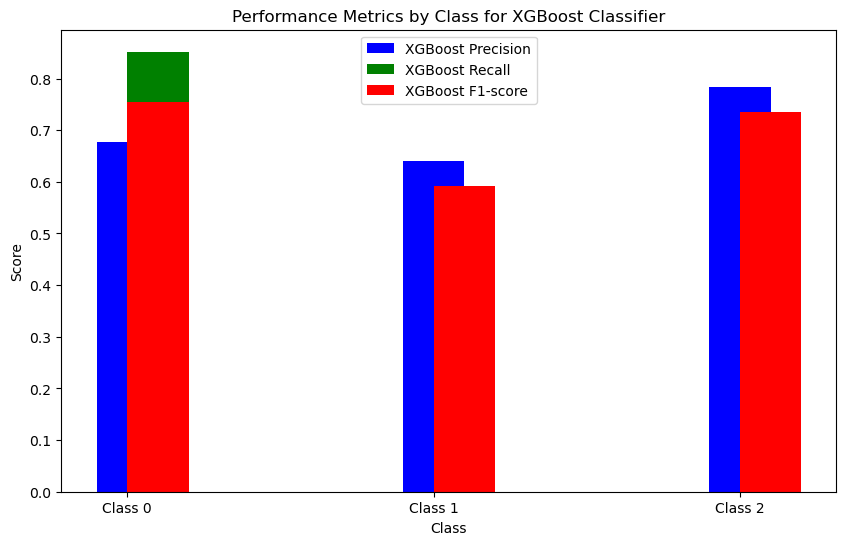

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

# Get precision, recall, and F1-score for both classifiers
precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(y_test, y_pred7, average=None)

# Define classes
classes = ['Class 0', 'Class 1', 'Class 2']

# Plotting
plt.figure(figsize=(10, 6))

plt.bar(classes, precision_rf, width=0.2, align='center', label='XGBoost Precision', color='blue')
plt.bar(classes, recall_rf, width=0.2, align='edge', label='XGBoost Recall', color='green')
plt.bar(classes, f1_rf, width=0.2, align='edge', label='XGBoost F1-score', color='red')

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Performance Metrics by Class for XGBoost Classifier')
plt.legend()
plt.show()


In [59]:
# Define the performance metrics for each technique
knn_metrics = {
    'accuracy': 0.82,
    'macro_avg': {'precision': 0.81, 'recall': 0.81, 'f1-score': 0.81},
    'weighted_avg': {'precision': 0.82, 'recall': 0.82, 'f1-score': 0.82}
}

rf_metrics = {
    'accuracy': 0.79,
    'macro_avg': {'precision': 0.78, 'recall': 0.79, 'f1-score': 0.78},
    'weighted_avg': {'precision': 0.81, 'recall': 0.79, 'f1-score': 0.79}
}

# Function to compare the techniques
def compare_techniques(knn, rf):
    print("Technique Comparison Report:")
    print("----------------------------")
    if knn['accuracy'] > rf['accuracy']:
        print("Technique 1 (KNN) performs better in overall accuracy.")
    else:
        print("Technique 2 (Random Forest) performs better in overall accuracy.")
    
    # Compare Macro Average Metrics
    print("\nMacro Average Comparison:")
    for metric in ['precision', 'recall', 'f1-score']:
        if knn['macro_avg'][metric] > rf['macro_avg'][metric]:
            print(f"Technique 1 (KNN) has higher {metric}: {knn['macro_avg'][metric]} vs {rf['macro_avg'][metric]}")
        else:
            print(f"Technique 2 (Random Forest) has higher {metric}: {rf['macro_avg'][metric]} vs {knn['macro_avg'][metric]}")
    
    # Compare Weighted Average Metrics
    print("\nWeighted Average Comparison:")
    for metric in ['precision', 'recall', 'f1-score']:
        if knn['weighted_avg'][metric] > rf['weighted_avg'][metric]:
            print(f"Technique 1 (KNN) has higher {metric}: {knn['weighted_avg'][metric]} vs {rf['weighted_avg'][metric]}")
        else:
            print(f"Technique 2 (Random Forest) has higher {metric}: {rf['weighted_avg'][metric]} vs {knn['weighted_avg'][metric]}")

# Call the function with KNN and Random Forest metrics
compare_techniques(knn_metrics, rf_metrics)


Technique Comparison Report:
----------------------------
Technique 1 (KNN) performs better in overall accuracy.

Macro Average Comparison:
Technique 1 (KNN) has higher precision: 0.81 vs 0.78
Technique 1 (KNN) has higher recall: 0.81 vs 0.79
Technique 1 (KNN) has higher f1-score: 0.81 vs 0.78

Weighted Average Comparison:
Technique 1 (KNN) has higher precision: 0.82 vs 0.81
Technique 1 (KNN) has higher recall: 0.82 vs 0.79
Technique 1 (KNN) has higher f1-score: 0.82 vs 0.79


In [60]:
X=df1.iloc[:,5:21:14]
X

,Browsing_Frequency,Shopping_Satisfaction
0,Few times a week,1
1,Few times a month,2
2,Few times a month,3
3,Few times a month,4
4,Few times a month,2
...,...,...
597,Few times a week,4
598,Few times a week,3
599,Few times a week,3
600,Few times a month,2


In [61]:
le1=LabelEncoder()
X['Browsing_Frequency']=le1.fit_transform(X['Browsing_Frequency'])

In [62]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
wcss=[]
for i in range(1,7):
  km=KMeans(n_clusters=i,init='k-means++',random_state=4)
  km.fit(X)
  wcss.append(km.inertia_)

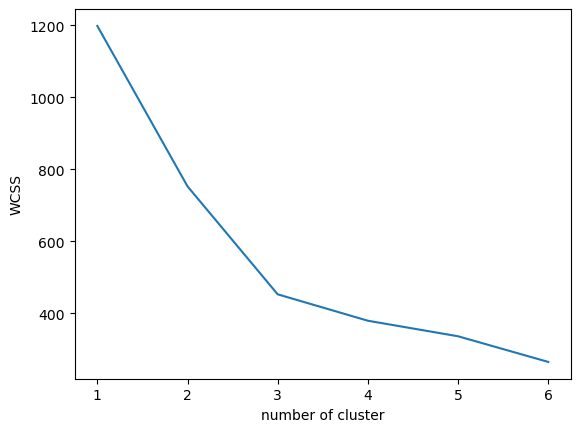

In [63]:
import matplotlib.pyplot as plt
plt.plot(range(1,7),wcss)
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

In [64]:
km1=KMeans(n_clusters=4,init='k-means++',random_state=5)
y_kmeans=km1.fit_predict(X)
y_kmeans

array([2, 2, 0, 0, 2, 1, 1, 1, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 1, 1, 2, 1, 1, 1, 2, 3, 2, 1, 2, 2,
       1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0,
       0, 2, 2, 0, 2, 1, 1, 2, 1, 2, 0, 1, 1, 3, 0, 2, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 3, 2, 2, 0, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 2, 2, 2,
       2, 1, 0, 3, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 1, 2, 3, 1, 1, 0, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 2, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 1, 0, 1, 2, 1, 2, 0, 0, 2, 0, 0, 0,
       0, 1, 2, 1, 2, 0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 2, 2, 2, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 2, 2, 0, 0, 3, 1,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 1, 0, 0, 3, 0, 3, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2,

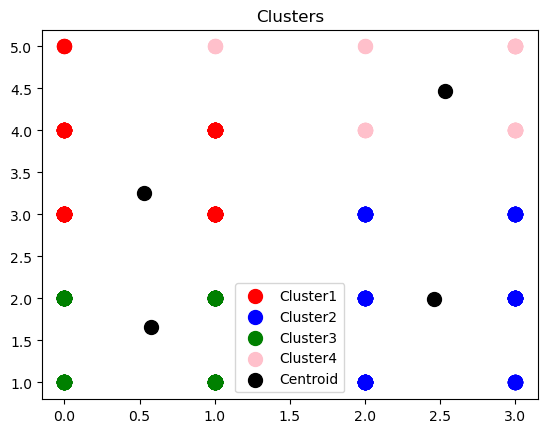

In [65]:
X=np.array(X)
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1],s = 100,c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1],s = 100,c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1],s = 100,c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1],s = 100,c = 'pink', label = 'Cluster4')
plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroid')
plt.title("Clusters")
plt.legend()
plt.show()

In [66]:
X=pd.DataFrame(X,columns=('Browsing_Frequency','Shopping_Satisfaction'))
y=np.array(y_kmeans)
X['cluster']=y
X['Browsing_Frequency']=le1.inverse_transform(X['Browsing_Frequency'])

In [67]:
X

,Browsing_Frequency,Shopping_Satisfaction,cluster
0,Few times a week,1,2
1,Few times a month,2,2
2,Few times a month,3,0
3,Few times a month,4,0
4,Few times a month,2,2
...,...,...,...
597,Few times a week,4,0
598,Few times a week,3,0
599,Few times a week,3,0
600,Few times a month,2,2


In [68]:
a=X.loc[X['cluster']==0][['Browsing_Frequency','Shopping_Satisfaction','cluster']]
a

,Browsing_Frequency,Shopping_Satisfaction,cluster
2,Few times a month,3,0
3,Few times a month,4,0
22,Few times a week,3,0
25,Few times a week,3,0
27,Few times a month,5,0
...,...,...,...
594,Few times a week,4,0
595,Few times a week,4,0
597,Few times a week,4,0
598,Few times a week,3,0


In [69]:
a['Browsing_Frequency'].value_counts()

Browsing_Frequency
Few times a week     118
Few times a month    106
Name: count, dtype: int64

In [70]:
a['Shopping_Satisfaction'].value_counts()

Shopping_Satisfaction
3    170
4     51
5      3
Name: count, dtype: int64

In [71]:
b=X.loc[X['cluster']==1][['Browsing_Frequency','Shopping_Satisfaction','cluster']]
b

,Browsing_Frequency,Shopping_Satisfaction,cluster
5,Rarely,2,1
6,Rarely,3,1
7,Rarely,3,1
15,Rarely,3,1
32,Rarely,3,1
...,...,...,...
555,Multiple times a day,1,1
564,Multiple times a day,2,1
569,Multiple times a day,3,1
596,Multiple times a day,3,1
